## Assignment 2: Regression and classification
### Stefan Dimitrov Velev, 0MI3400521, Big Data Technologies
### Faculty of Mathematics and Informatics, Sofia University

### Task 1: Regression

#### a. Find a linear regression model that relates the living area to the selling price. 
#### If you did any data cleaning step(s), describe what you did and explain why.

In [20]:
# Import required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Read the given CSV file
df = pd.read_csv('./data/data_assignment2.csv', delimiter=',')

In [4]:
df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


In [5]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 56


In [6]:
# Remove the unnecessary columns in the data frame
df = df[['ID', 'Living_area', 'Selling_price']]

In [7]:
df.head()

,ID,Living_area,Selling_price
0,1,104,4600000
1,2,99,4450000
2,3,133,4900000
3,4,175,6625000
4,5,118,4600000


In [8]:
# Remove rows with missing values
df = df.dropna()

In [9]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 56


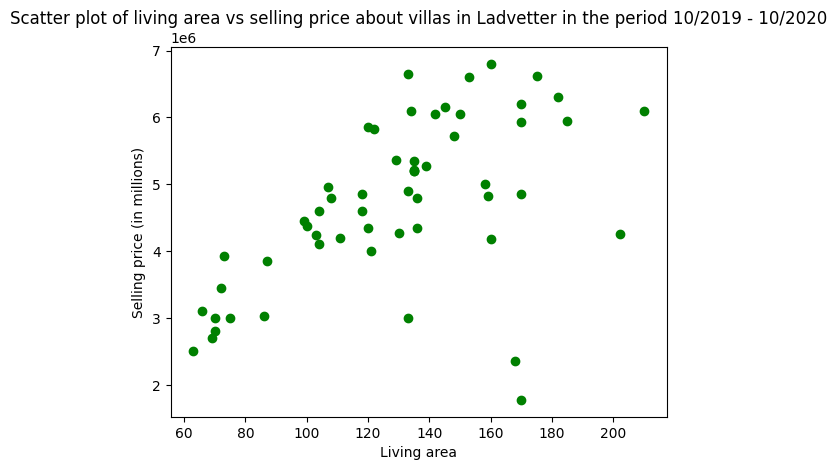

In [12]:
# plt.figure(figsize=(18, 8))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
    
# plt.xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000])
plt.xlabel('Living area')
plt.ylabel('Selling price (in millions)')
plt.title('Scatter plot of living area vs selling price about villas in Landvetter in the period 10/2019 - 10/2020')
plt.show()

In [13]:
# Observe some statistics related to the data
df.describe()

,ID,Living_area,Selling_price
count,56.000000,56.000000,5.600000e+01
mean,28.500000,128.678571,4.713125e+06
std,16.309506,36.006619,1.241117e+06
min,1.000000,63.000000,1.775000e+06
25%,14.750000,104.000000,4.075000e+06
50%,28.500000,133.000000,4.812500e+06
75%,42.250000,154.250000,5.831250e+06
max,56.000000,210.000000,6.800000e+06


In [14]:
# Find the two outliers with high living area but low selling price
min_price_outliers = df.nsmallest(n= 2, columns = 'Selling_price')
print(min_price_outliers)

    ID  Living_area  Selling_price
40  41          170        1775000
45  46          168        2360000


In [16]:
# Remove the outliers from the df
df = df.drop(min_price_outliers.index)

In [18]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 54


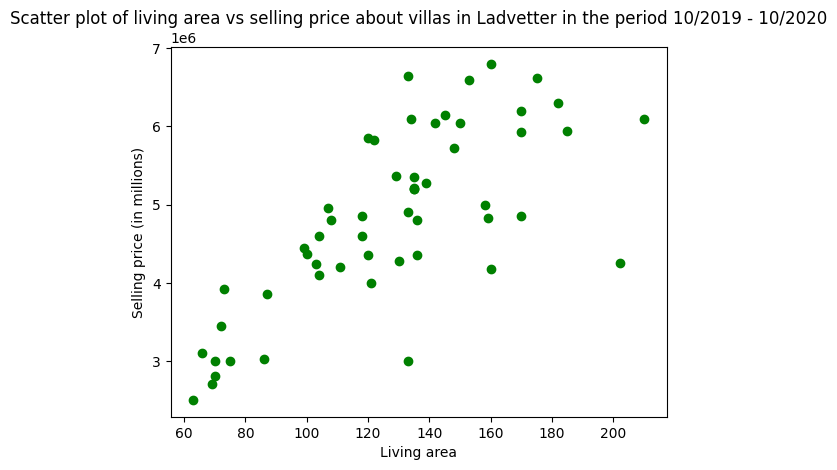

In [19]:
# plt.figure(figsize=(18, 8))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
    
# plt.xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000])
plt.xlabel('Living area')
plt.ylabel('Selling price (in millions)')
plt.title('Scatter plot of living area vs selling price about villas in Landvetter in the period 10/2019 - 10/2020')
plt.show()

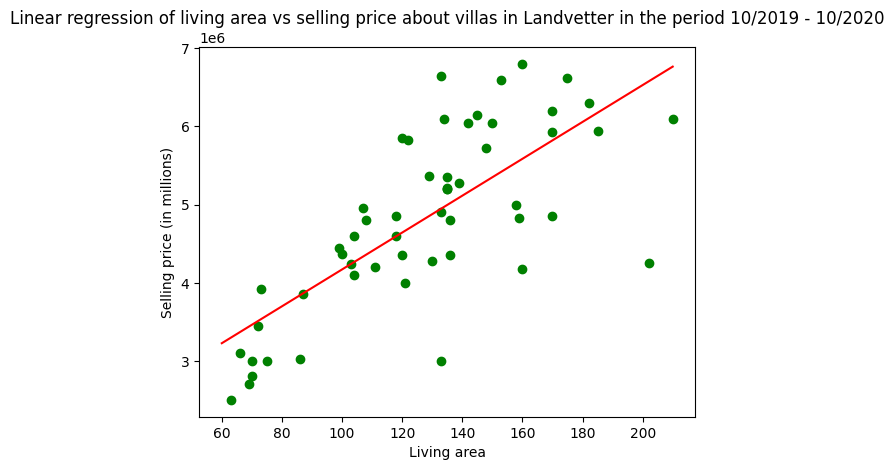

In [26]:
model = LinearRegression()
model.fit(df['Living_area'].values[:, np.newaxis], df['Selling_price'])
xfit = np.array([60, 210])
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(df['Living_area'], df['Selling_price'], color='green')
plt.plot(xfit, yfit, color='red')
    
plt.xlabel('Living area')
plt.ylabel('Selling price (in millions)')
plt.title('Linear regression of living area vs selling price about villas in Landvetter in the period 10/2019 - 10/2020')
plt.show()

#### a. What are the values of the slope and intercept of the regression line?

In [27]:
print('The value of the slope (gradient) is:', model.coef_[0])
print('The value of the intercept is:', model.intercept_)

The value of the slope (gradient) is: 23597.794749444976
The value of the intercept is: 1809821.2159409611
